# Introduction to NLP Fundamentals in Tensorflow  
NLP has the goal of deriving information out of natural language (could be sequences of text or speech).  
Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c05f776f-f775-1dcb-d9e4-e1a231cadb64)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data,create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-08-14 10:11:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-14 10:11:39 (78.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-08-14 10:11:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-08-14 10:11:45 (40.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualize a text dataset

To visualize our text samples, we first have to read them in, one way to do so would be to use Python.  
Another way is to use Pandas.

In [ ]:
import pandas as pd
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle traning dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}","(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}")
  print("---\n")

Target: 0 (not real disaster)
Text:
As I catch the last few minutes. Finally Monwabisi gets shot lol. Hlongwane was ryt. The twins r gonna destroy each other #AshesToAshes
---

Target: 0 (not real disaster)
Text:
@__ohhmyjoshh @stevenrulles he not gonna be thinking that when he gets his shit wrecked on the first day of school ??
---

Target: 0 (not real disaster)
Text:
it's don't panic
---

Target: 0 (not real disaster)
Text:
RT alisonannyoung: EXCLUSIVE: FedEx no longer to transport research specimens of bioterror pathogens in wake of anthrax lab mishaps Û_
---

Target: 1 (real disaster)
Text:
16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/n7Yst76ku3
---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),train_df_shuffled["target"].to_numpy(),test_size=0.1,random_state=42)

In [ ]:
# Check the lengths of the dataframes
len(train_sentences),len(val_sentences)

(6851, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.  

There are a few ways to do this, namely:
* **Tokenization** - direct mapping of token (a token could be a word or a character) to  number.
* **Embedding** - create a matix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned).

### Text vectorization (tokenization)

In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words
                                    output_mode = "int",
                                    output_sequence_length=None)
                                    # pad_to_max_tokens=True)

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the train set
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it 
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence fromt the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text: \n {random_sentence}\
\n\nVectorized version:\n{text_vectorizer([random_sentence])}")

Original text: 
 MH370: Intact part lifts odds plane glided not crashed into sea http://t.co/8pdnHH6tzH

Vectorized version:
[[ 171 5354  453    1 3573  570    1   34  402   66  990    1    0    0
     0]]


In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using a Embedding Layer  
To make our embedding, we're going ot use Tensorflow's embedding layer.  
The parameters we care most about for our embedding layer:
* `input_dim` = the size of the vocabulary
* `output_dim`  = the size of the output embedding vector, for a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer.

In [ ]:
from tensorflow.keras import layers

embedding  = layers.Embedding(input_dim = max_vocab_length,
                              output_dim = 128,
                              embeddings_initializer="uniform",
                              input_length = max_length)

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
\n\nEmbedded version:\n{embedding(text_vectorizer([random_sentence]))}")

Original text:
Police Monitoring 200 Jihadis in Poland http://t.co/1wCOfmLUb9 via @freedomoutpost

Embedded version:
[[[ 0.04533675 -0.01198715  0.03774254 ...  0.03085704 -0.00309085
   -0.03452543]
  [-0.01937143 -0.04675505 -0.03169639 ...  0.0408258   0.01056515
    0.03155765]
  [ 0.02778381 -0.04439882  0.02890308 ...  0.04969322  0.00056965
    0.0167998 ]
  ...
  [-0.04385583  0.04210425  0.02980177 ... -0.03773147  0.04651541
   -0.00643332]
  [-0.04385583  0.04210425  0.02980177 ... -0.03773147  0.04651541
   -0.00643332]
  [-0.04385583  0.04210425  0.02980177 ... -0.03773147  0.04651541
   -0.00643332]]]


## Modelling a text dataset (running a series of experiments)  

Now we've got a way to turn our text into numbers, it's time to start building a series of modelling experiments.  
We'll start with a baseline model and move on from there.
* Model 0: Naive Bayes (baseline),
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

| Experiment Number      | Model |
| ----------- | ----------- |
| 0      | Naive Bayes with TF-IDF encoder       |
| 1   | Feed-forward neural network        |
| 2   | LSTM (RNN)        |
| 3   | GRU (RNN)        |
| 4   | Bidirectional-LSTM (RNN)        |
| 5   | 1D Convolutional Neural Network        |
| 6   | Tensorflow Hub Pretrained Feature Extractor        |
| 7   | Tensorflow Hub Pretrained Feature Extractor (10% of data)        |

How are we going to approach all of these?  
Use the standard steps in modelling with Tensorflow:
* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0: Getting a baseline
As with all machine learning, it's important to create a baseline modelso you've got a benchmark for future experiments.  
To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using TF-IDF formula to convert our words to numbers.
> 🔑**Note:** It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline(
    [
     ("tfidf",TfidfVectorizer()), # convert words to numbers using tfidf
     ("clf",MultinomialNB()), # model the text
    ]
)

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Baseline model score: {baseline_score}")

Baseline model score: 0.7926509186351706


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments
We could evaluate all of our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function.  
Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Function to get multiple metrics as a dict
def get_metrics(y_true,y_pred):
  """
  Calculates model accuracy, precision, recall and f1-score of a binary classification model
  """
  return {"Accuracy":accuracy_score(y_true,y_pred)*100,"Precision":precision_score(y_true,y_pred)*100,"Recall":recall_score(y_true,y_pred)*100,"F1-score":f1_score(y_true,y_pred,average="weighted")*100}

In [ ]:
# Get baseline results
baseline_results = get_metrics(y_true=val_labels,y_pred=baseline_preds)

baseline_results

{'Accuracy': 79.26509186351706,
 'F1-score': 78.6218975804955,
 'Precision': 88.6178861788618,
 'Recall': 62.643678160919535}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string) # inputs are 1-D strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each tokem to one vector
outputs = layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220814-101153
Epoch 1/5
215/215 [==============================] - 6s 5ms/step - loss: 0.6090 - accuracy: 0.6957 - val_loss: 0.5337 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.8200 - val_loss: 0.4680 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3460 - accuracy: 0.8605 - val_loss: 0.4522 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.8918 - val_loss: 0.4622 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9152 - val_loss: 0.4872 - val_accuracy: 0.7900


In [ ]:
# Evaluate results on val set
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7900


[0.487215131521225, 0.7900262475013733]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.24698894], dtype=float32)

In [ ]:
model_1_pred_probs[:10]

array([[0.24698894],
       [0.78063077],
       [0.9978757 ],
       [0.08270682],
       [0.0957318 ],
       [0.9318683 ],
       [0.9015339 ],
       [0.99345905],
       [0.9525839 ],
       [0.21492083]], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# Calculate our model_1 results
model_1_results = get_metrics(val_labels,model_1_preds)
model_1_results

{'Accuracy': 79.00262467191601,
 'F1-score': 78.59832179841351,
 'Precision': 84.55882352941177,
 'Recall': 66.0919540229885}

In [ ]:
baseline_results

{'Accuracy': 79.26509186351706,
 'F1-score': 78.6218975804955,
 'Precision': 88.6178861788618,
 'Recall': 62.643678160919535}

In [ ]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False,  True, False])

## Visualize learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim

(10000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.  
To do so, Tensorflow has a handy tool call projector: https://projector.tensorflow.org/

And Tensorflow also has an incredible guide on word embeddings themselves.

In [ ]:
# Create embedding files (we got this from TensorFlow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

## Recurrent Neural Networks (RNN's)  
RNNs are useful for sequence data.  
The premise of a recurrent neural network is to use the representation of  previous input to aid the representation of a later input.  

### Model 2: LSTM

LSTM = long short term menory (one of the most popular LSTM cells)  
Our structure of an RNN typically looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # when you're stacking RNN cells together you need to set the return_sequences=True for the first cell
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
# Get summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220814-101207
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.2214 - accuracy: 0.9172 - val_loss: 0.5950 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1530 - accuracy: 0.9441 - val_loss: 0.6586 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1258 - accuracy: 0.9508 - val_loss: 0.7311 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1037 - accuracy: 0.9607 - val_loss: 0.8576 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0831 - accuracy: 0.9677 - val_loss: 1.0234 - val_accuracy: 0.7795


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[8.7284483e-03],
       [7.6790828e-01],
       [9.9992359e-01],
       [4.1000970e-02],
       [4.4773071e-04],
       [9.9974698e-01],
       [9.8661464e-01],
       [9.9994409e-01],
       [9.9989939e-01],
       [7.9680955e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = get_metrics(y_true=val_labels,y_pred=model_2_preds)
model_2_results

{'Accuracy': 77.95275590551181,
 'F1-score': 77.76506830100394,
 'Precision': 79.60526315789474,
 'Recall': 69.54022988505747}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.  
The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x) # If you want to stack recurrent layers on top of each other, you need to set return_sequences=True
# x = layers.LSTM(64,return_sequences=True)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64,activation="relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220814-101220
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1549 - accuracy: 0.9402 - val_loss: 0.6808 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0819 - accuracy: 0.9680 - val_loss: 0.7315 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0707 - accuracy: 0.9731 - val_loss: 0.9935 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0628 - accuracy: 0.9755 - val_loss: 1.0641 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0508 - accuracy: 0.9778 - val_loss: 1.1345 - val_accuracy: 0.7795


In [ ]:
# Make some predictions on val set
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[6.4818120e-01],
       [7.6009911e-01],
       [9.9979359e-01],
       [1.5901677e-01],
       [8.4819774e-05],
       [9.9964333e-01],
       [9.3002462e-01],
       [9.9984467e-01],
       [9.9984562e-01],
       [9.6044123e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = get_metrics(val_labels,model_3_preds)
model_3_results

{'Accuracy': 77.95275590551181,
 'F1-score': 77.90235518023306,
 'Precision': 77.10843373493977,
 'Recall': 73.5632183908046}

### Model 4: Bidirectional RNN  

Normal RNNs go from left to right (just like you'd read an English sentence). However, a bidirectional RNN goes from right to left, as well as left to right.


In [ ]:
# Build a bidirectional RNN
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name = "model_4_bidirectional")

In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220814-101232
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1053 - accuracy: 0.9689 - val_loss: 0.9441 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0532 - accuracy: 0.9758 - val_loss: 1.2669 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0441 - accuracy: 0.9783 - val_loss: 1.3179 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0478 - accuracy: 0.9783 - val_loss: 1.5328 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0436 - accuracy: 0.9799 - val_loss: 1.2929 - val_accuracy: 0.7677


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[6.5452212e-01],
       [7.4204576e-01],
       [9.9999130e-01],
       [2.0461544e-01],
       [5.5958939e-05],
       [9.9996495e-01],
       [9.9839681e-01],
       [9.9999499e-01],
       [9.9999416e-01],
       [9.9966562e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = get_metrics(val_labels,model_4_preds)
model_4_results

{'Accuracy': 76.77165354330708,
 'F1-score': 76.68863186407148,
 'Precision': 76.3076923076923,
 'Recall': 71.26436781609196}

## Convolutional Neural Networks for Text (and other types of sequences)  
We've used CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.  
Previously we've Conv2D for our image data but now we're going to use Conv1D.  
The typical structure of a Conv1D model for sequences (in our case, text):  
```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```


### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        activation='relu',
                        padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature"

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# Create 1-D convolutional layer
from tensorflow.keras import layers
inputs  = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64,activation="relu")
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Get a summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20220814-101253
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1223 - accuracy: 0.9590 - val_loss: 0.9375 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0743 - accuracy: 0.9710 - val_loss: 1.0661 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0584 - accuracy: 0.9777 - val_loss: 1.1451 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0557 - accuracy: 0.9769 - val_loss: 1.1866 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9774 - val_loss: 1.2406 - val_accuracy: 0.7520


In [ ]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.9375484e-01],
       [7.4403358e-01],
       [9.9997115e-01],
       [6.3651457e-02],
       [1.9792544e-07],
       [9.9278671e-01],
       [9.9046701e-01],
       [9.9997973e-01],
       [9.9999952e-01],
       [9.4984508e-01]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = get_metrics(val_labels,model_5_preds)
model_5_results

{'Accuracy': 75.19685039370079,
 'F1-score': 75.04314680919143,
 'Precision': 75.39936102236422,
 'Recall': 67.81609195402298}

## Model 6: Tensorflow Hub Pretrained Sentence Encoder  
Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using tensorlfow hub's universal sentence encoder: https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,"When you can use the universal encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",input_shape=[],dtype=tf.string,trainable=False,name="USE")


In [ ]:
# Create model using Sequential API
model_6 = tf.keras.Sequential(
    [
     sentence_encoder_layer,
     layers.Dense(64,activation="relu"),
     layers.Dense(1,activation="sigmoid",name="output_layer")
    ],name="model_6_USE"
)

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Get the summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220814-101324
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5067 - accuracy: 0.7787 - val_loss: 0.4485 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4145 - accuracy: 0.8148 - val_loss: 0.4352 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3989 - accuracy: 0.8229 - val_loss: 0.4398 - val_accuracy: 0.8045
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3916 - accuracy: 0.8282 - val_loss: 0.4341 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3839 - accuracy: 0.8318 - val_loss: 0.4250 - val_accuracy: 0.8136


In [ ]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.18756801],
       [0.73947823],
       [0.9909434 ],
       [0.21689603],
       [0.6681737 ],
       [0.67524314],
       [0.9841949 ],
       [0.9838828 ],
       [0.94277006],
       [0.09350028]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate results
model_6_results = get_metrics(val_labels,model_6_preds)
model_6_results

{'Accuracy': 81.36482939632546,
 'F1-score': 81.20618868299144,
 'Precision': 83.88157894736842,
 'Recall': 73.27586206896551}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.  
To see how our model performs on a smaller dataset, let's replicate `model_6`, except we 'll train it on 10% of the data.

> 💡**Note:** Making data splits like below leads to data leakage. **DO NOT MAKE DATA SPLITS WHICH MAKE DATA FROM VALIDATION/TEST SETS INTO TRAINING SETS**

In [ ]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1,random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of targets in our subset of data
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

To recreate a model the same as a previous model you've created you cna use teh `tf.keras.models.clone_model()` method.

In [ ]:
# Let's build a model same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20220814-101350
Epoch 1/5
22/22 [==============================] - 3s 41ms/step - loss: 0.6706 - accuracy: 0.6453 - val_loss: 0.6518 - val_accuracy: 0.6850
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6006 - accuracy: 0.7898 - val_loss: 0.5958 - val_accuracy: 0.7638
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5225 - accuracy: 0.8102 - val_loss: 0.5396 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4585 - accuracy: 0.8277 - val_loss: 0.5077 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4179 - accuracy: 0.8277 - val_loss: 0.4914 - val_accuracy: 0.7795


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.19550063],
       [0.59360075],
       [0.90224415],
       [0.42995492],
       [0.59412503],
       [0.6876013 ],
       [0.8836987 ],
       [0.814452  ],
       [0.844147  ],
       [0.1491577 ]], dtype=float32)

In [ ]:
# Convert pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model 7 predictions
model_7_results = get_metrics(val_labels,model_7_preds)
model_7_results

{'Accuracy': 77.95275590551181,
 'F1-score': 77.81078501550944,
 'Precision': 78.84615384615384,
 'Recall': 70.6896551724138}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline":baseline_results,
                                  "1_simple_dense":model_1_results,
                                  "2_lstm":model_2_results,
                                  "3_gru":model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_conv1D":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder_10_percent":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1-score
0_baseline,79.265092,88.617886,62.643678,78.621898
1_simple_dense,79.002625,84.558824,66.091954,78.598322
2_lstm,77.952756,79.605263,69.540230,77.765068
3_gru,77.952756,77.108434,73.563218,77.902355
4_bidirectional,76.771654,76.307692,71.264368,76.688632
5_conv1D,75.196850,75.399361,67.816092,75.043147
6_tf_hub_use_encoder,81.364829,83.881579,73.275862,81.206189
7_tf_hub_use_encoder_10_percent,77.952756,78.846154,70.689655,77.810785


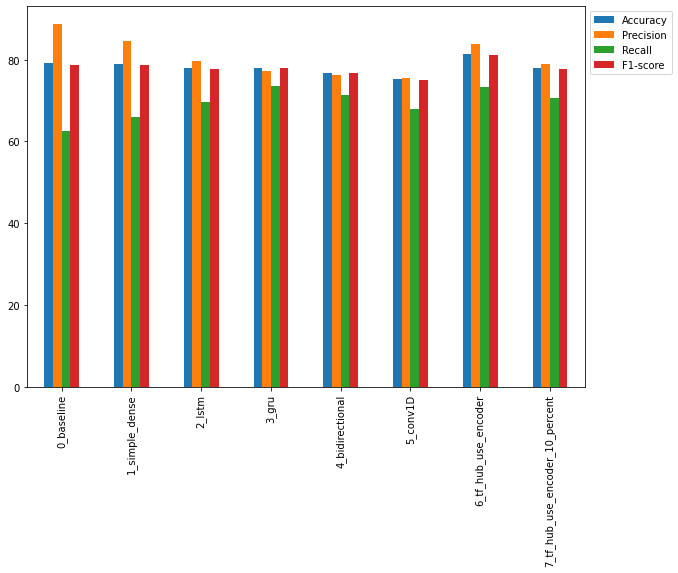

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

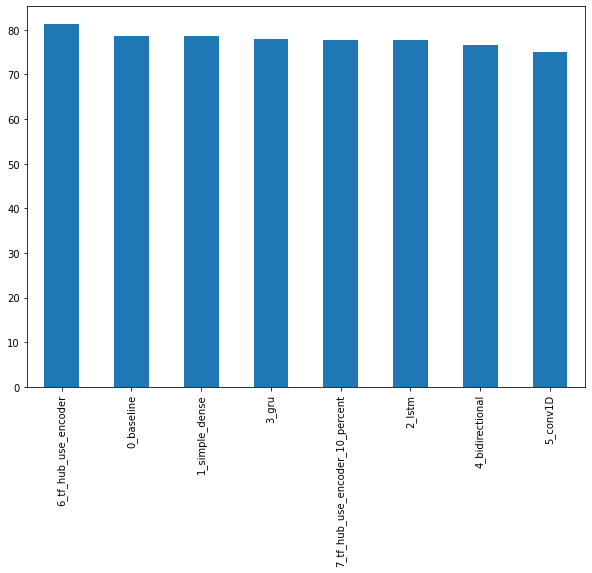

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("F1-score",ascending=False)["F1-score"].plot(kind="bar",figsize=(10,7))

## Uploading our model training logs to TensorBoard.dev

In [ ]:
# View Tensorboard logs of transfer learning modelling experiments (plus all of our other models)
!tensorboard dev upload --logdir ./model_logs/ --name "NLP Modelling Experiments" --description "Comparing multiple different types of model architectures on the Kaggle NLP disaster tweets dataset." --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags) or 0
  File "/usr/local/

## Saving and loading a trained model
There are two main formats to save a model to in Tensorflow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using Tensorflow)

In [ ]:
!mkdir model_zip

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_zip/best_model.h5")

In [ ]:
!zip -r /content/model_zipped.zip /content/model_zip

  adding: content/model_zip/ (stored 0%)
  adding: content/model_zip/best_model.h5 (deflated 7%)


In [ ]:
from google.colab import files
files.download("/content/model_zipped.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load model with custom Hub Layer (required HDF5)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4250 - accuracy: 0.8136


[0.42501431703567505, 0.8136482834815979]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format
model_6.save("best_model_SavedModel_format")

In [ ]:
# Load in a model from SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4250 - accuracy: 0.8136


[0.42501431703567505, 0.8136482834815979]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example, if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (close to 1) and vice versa.

In [ ]:
# Create DataFrame with validation and best performing model predictions
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-08-14 10:14:33--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  57.7MB/s    in 14s     

2022-08-14 10:14:48 (65.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  

In [ ]:
# Import previously trained model
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

OSError: ignored

In [ ]:
# Make predictions
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

In [ ]:
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

In [ ]:
# Find the wrong predictions and sort by prediction probabilites
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong.head(10)

In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-------\n")